In [6]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

from bayesian_analysis import FitConfig
from cr_knee_fit import experiments
from cr_knee_fit.elements import Element
from cr_knee_fit.fit_data import Data, DataConfig
from cr_knee_fit.model_ import Model

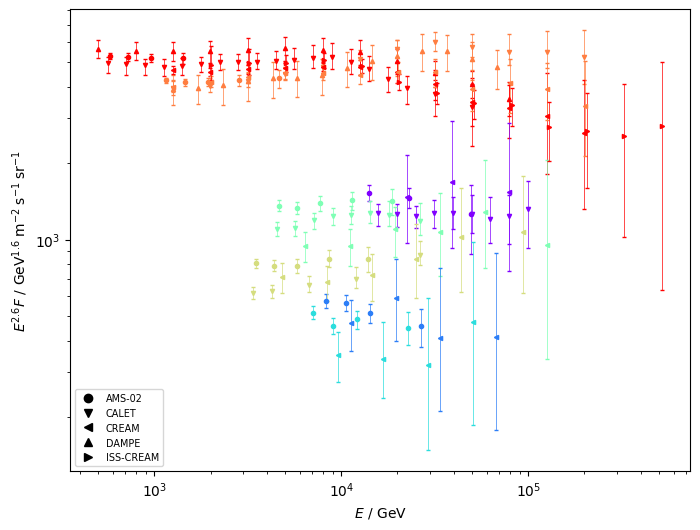

In [23]:
fit_data = Data.load(
    DataConfig(
        experiments_elements=experiments.DIRECT,  # + [experiments.grapes, experiments.lhaaso_qgsjet],
        experiments_all_particle=[],
        experiments_lnA=[],
        elements=Element.regular(),
        elements_R_bounds=(5e2, 1e10),
    )
)
fit_data.plot(scale=2.6);

In [24]:
FIT_DIR = Path("out/basic")
fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
theta_best_fit = np.loadtxt(FIT_DIR / "posterior-ml.txt")
best_fit_model = Model.unpack(theta_best_fit, layout_info=fc.model)

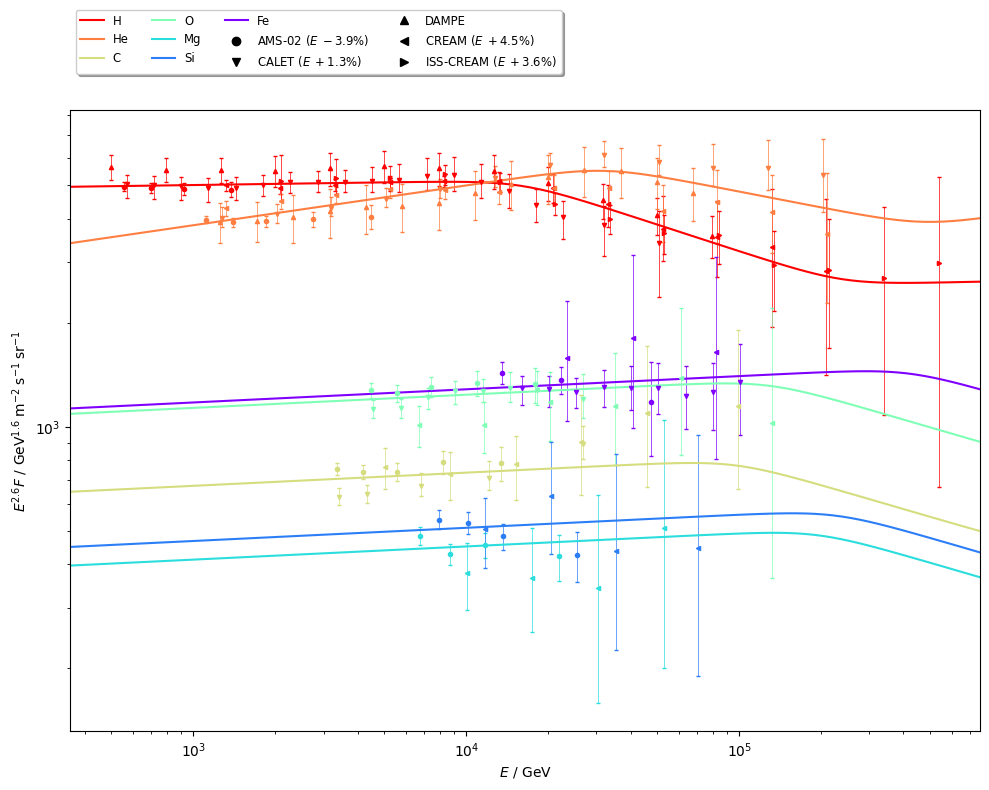

In [25]:
fig = best_fit_model.plot_spectra(fit_data, scale=2.6)
ax = fig.axes[0]
# ax.set_xlim(right=1e5)

In [12]:
theta_sample.shape

(15168, 22)

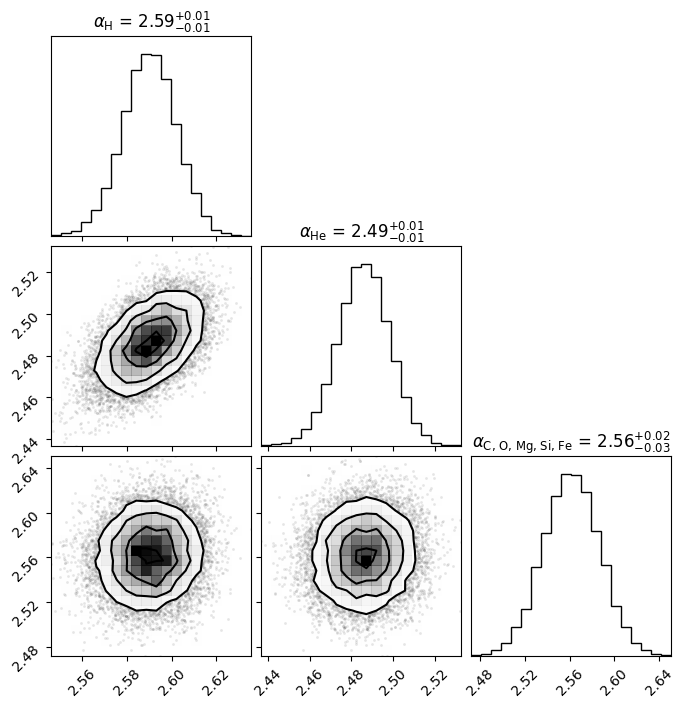

In [13]:
import corner

dims = [1, 3, 9]

alphas = theta_sample[:, dims]
titles = np.array(["$" + lbl + "$" for lbl in best_fit_model.labels(True)])[dims]

fig = corner.corner(data=alphas, bins=20, titles=titles, show_titles=True)

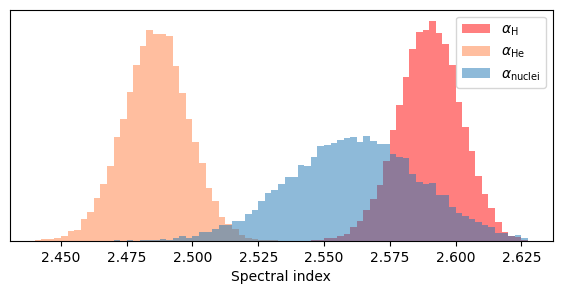

In [34]:
import itertools

fig, ax = plt.subplots(figsize=(7, 3))
bins = np.arange(2.44, 2.63, 0.0025)
for alpha, title, color in zip(
    alphas.T,
    itertools.chain(
        titles[:2],
        ["$ \\alpha_\\text{nuclei}$"],
    ),
    (Element.H.color, Element.He.color, "tab:blue"),
):
    ax.hist(
        alpha,
        label=title,
        bins=list(bins),
        color=color,
        alpha=0.5,
    )
ax.set_xlabel("Spectral index")
ax.set_yticks([])
ax.legend()
plt.show()